#Notebook: SVM Model
##Author: Lucía Núñez Calvo
###Date: 16/04/2024

####Summary

This notebook shows several implementations of the Support Vector Machine (**SVM**) model, where experiments with and without cross-validation have been performed, and each of these tests has been carried out using two types of audio features: Mel Frequency Cepstral Coefficients (**MFCC**) and Linear Predictive Coding (**LPC**). In addition, two different classification approaches have been tested: One-vs-Rest (**OvR**) and One-vs-One (**OvO**), resulting in a total of eight tests.

In the first part of the notebook, the SVM model is trained and evaluated **without** using **cross-validation** techniques. These initial tests allow the performance of the model to be observed on a single set of training and test data, providing an initial insight into its performance. Within this configuration, four tests have been performed:
1. One-vs-Rest using MFCC features (OvR-MFCC).
2. One-vs-Rest using LPC features (OvR-LPC).
3. One-vs-One using MFCC features (OvO-MFCC).
4. One-vs-One using LPC features (OvO-LPC).


Subsequently, the second implementation applies **cross-validation** to evaluate the model. This technique splits the dataset into several parts and performs multiple training and evaluations, providing a more robust and reliable estimate of the model's performance. Within this setup, four other tests have been performed:
1. One-vs-Rest using MFCC features (OvR-MFCC).
2. One-vs-Rest using LPC features (OvR-LPC).
3. One-vs-One using MFCC features (OvO-MFCC).
4. One-vs-One using LPC features (OvO-LPC).

At the end of the notebook, a comparison of the results obtained from both implementations is performed. For this purpose, **confusion matrices** and graphs reflecting the **Accuracy**, **Recall** and **F1-score** metrics of the different classes have been created. These visualisations allow a detailed comparison of the performance of the model in each approach, providing a clear view of the strengths and weaknesses of each method and helping to determine the best strategy for classification.


---


####Structure of the notebook

0. Load features
1. SVM without cross-validation
2. SVM with cross-validation
3. Checking the results
4. Save the results


In [1]:
import os
import joblib
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

## 0. Load features

In [3]:
features_mfcc = np.load('features_mfcc.npy')
features_lpc = np.load('features_lpc.npy')
labels = np.load('labels.npy')

In [4]:
print("Length of MFCC features:", len(features_mfcc))
print("Length of LPC features:", len(features_lpc))
print("Length of labels:", len(labels))

Length of MFCC features: 432
Length of LPC features: 432
Length of labels: 432


## 1. SVM without cross-validation

In [3]:
def create_model(features, labels, classifier, kernel):
  '''
  This function creates and trains an SVM model.

  Input:
    - features: (array) Set of input features for the model.
    - labels: (array) Labels corresponding to the input features.
    - classifier: (objects like OneVsRestClassifier or OneVsOneClassifier) Object that configures the SVM classifier according to a specific classification strategy, such as OvR or OvO.
    - kernel: (str) Type of kernel to be used in the SVM model.

  Output:
    - model: (SVC) Trained SVM model.
    - y_test: (array) Labels of the test set.
    - y_pred: (array) Labels predicted by the model in the test set.
  '''
  # Division of data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

  # Scaling the features
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Training the model
  model = SVC(kernel=kernel, C=10, probability=True)
  model = classifier(model)
  model.fit(X_train, y_train)

  # Evaluation of the model
  y_pred = model.predict(X_test)

  return model, y_test, y_pred

In [4]:
# Tests with MFCC features and One-vs-Rest classifier
model_mfcc_ovr, y_test_mfcc_ovr, y_pred_mfcc_ovr = create_model(features_mfcc, labels, OneVsRestClassifier, 'linear')
print(classification_report(y_test_mfcc_ovr, y_pred_mfcc_ovr))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        43
           1       0.97      1.00      0.98        30
           2       0.74      0.87      0.80        23
           3       1.00      1.00      1.00        34

    accuracy                           0.92       130
   macro avg       0.91      0.92      0.91       130
weighted avg       0.92      0.92      0.92       130



In [5]:
# Tests with LPC features and One-vs-Rest classifier
model_lpc_ovr, y_test_lpc_ovr, y_pred_lpc_ovr = create_model(features_lpc, labels, OneVsRestClassifier, 'linear')
print(classification_report(y_test_lpc_ovr, y_pred_lpc_ovr))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       1.00      1.00      1.00        30
           2       0.83      0.65      0.73        23
           3       1.00      1.00      1.00        34

    accuracy                           0.92       130
   macro avg       0.92      0.90      0.90       130
weighted avg       0.92      0.92      0.91       130



In [6]:
# Tests with MFCC features and One-vs-One classifier
model_mfcc_ovo, y_test_mfcc_ovo, y_pred_mfcc_ovo = create_model(features_mfcc, labels, OneVsOneClassifier, 'rbf')
print(classification_report(y_test_mfcc_ovo, y_pred_mfcc_ovo))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        30
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        34

    accuracy                           0.98       130
   macro avg       0.98      0.99      0.98       130
weighted avg       0.99      0.98      0.98       130



In [7]:
# Tests with LPC features and One-vs-One classifier
model_lpc_ovo, y_test_lpc_ovo, y_pred_lpc_ovo = create_model(features_lpc, labels, OneVsOneClassifier, 'rbf')
print(classification_report(y_test_lpc_ovo, y_pred_lpc_ovo))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        43
           1       1.00      1.00      1.00        30
           2       0.94      0.65      0.77        23
           3       1.00      1.00      1.00        34

    accuracy                           0.93       130
   macro avg       0.94      0.91      0.92       130
weighted avg       0.94      0.93      0.93       130



## 2. SVM with cross-validation

In [8]:
def create_model_with_cross_validation(features, labels, classifier, kernel):
    '''
    This function creates and trains an SVM model.
    During each iteration of the cross-validation, the actual labels of the test set (y_test) and the labels predicted by the model (y_pred) are accumulated.
    This is done to combine the results of all the folds and get an overall evaluation of the model.

    Input:
      - features: (array) Set of input features for the model.
      - labels: (array) Labels corresponding to the input features.
      - classifier: (objects like OneVsRestClassifier or OneVsOneClassifier) Object that configures the SVM classifier according to a specific classification strategy, such as OvR or OvO.
      - kernel: (str) Type of kernel to be used in the SVM model.

    Output:
      - pipeline: (Pipeline) Trained SVM model.
      - y_test: (array) Labels of the test set.
      - y_pred: (array) Labels predicted by the model in the test set.
    '''

    y_test_accum = []
    y_pred_accum = []

    # Processing and training pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),       # Step 1: Feature scaling
        ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Selection of features
        ('pca', PCA(n_components=10)),       # Step 3: Reduced dimensionality
        ('classifier', classifier(SVC(kernel=kernel, C=10)))  # Step 4: SVM classifier
    ])

    # Cross-validation with 5 folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in cv.split(features, labels):

        # Division of data into training and test sets
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        # Training the model
        pipeline.fit(X_train, y_train)

        # Evaluation of the model
        y_pred = pipeline.predict(X_test)

        # Accumulate results
        y_test_accum.extend(y_test)
        y_pred_accum.extend(y_pred)

    return pipeline, np.array(y_test_accum), np.array(y_pred_accum)

In [9]:
# Tests with MFCC features, One-vs-Rest classifier and cross-validation
pipeline_mfcc_ovr, y_test_mfcc_cv_ovr, y_pred_mfcc_cv_ovr = create_model_with_cross_validation(features_mfcc, labels, OneVsRestClassifier, 'linear')
print(classification_report(y_test_mfcc_cv_ovr, y_pred_mfcc_cv_ovr))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       108
           1       0.95      1.00      0.97       108
           2       0.85      0.59      0.70       108
           3       0.92      1.00      0.96       108

    accuracy                           0.87       432
   macro avg       0.87      0.87      0.86       432
weighted avg       0.87      0.87      0.86       432



In [10]:
# Tests with LPC features, One-vs-Rest classifier and cross-validation
pipeline_lpc_ovr, y_test_lpc_cv_ovr, y_pred_lpc_cv_ovr = create_model_with_cross_validation(features_lpc, labels, OneVsRestClassifier, 'linear')
print(classification_report(y_test_lpc_cv_ovr, y_pred_lpc_cv_ovr))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       108
           1       1.00      1.00      1.00       108
           2       0.92      0.71      0.80       108
           3       1.00      1.00      1.00       108

    accuracy                           0.91       432
   macro avg       0.92      0.91      0.91       432
weighted avg       0.92      0.91      0.91       432



In [11]:
# Tests with MFCC features, One-vs-One classifier and cross-validation
pipeline_mfcc_ovo, y_test_mfcc_cv_ovo, y_pred_mfcc_cv_ovo = create_model_with_cross_validation(features_mfcc, labels, OneVsOneClassifier, 'rbf')
print(classification_report(y_test_mfcc_cv_ovo, y_pred_mfcc_cv_ovo))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.97      1.00      0.99       108
           2       0.92      0.90      0.91       108
           3       0.99      1.00      1.00       108

    accuracy                           0.96       432
   macro avg       0.96      0.96      0.96       432
weighted avg       0.96      0.96      0.96       432



In [12]:
# Tests with LPC features, One-vs-One classifier and cross-validation
pipeline_lpc_ovo, y_test_lpc_cv_ovo, y_pred_lpc_cv_ovo = create_model_with_cross_validation(features_lpc, labels, OneVsOneClassifier, 'rbf')
print(classification_report(y_test_lpc_cv_ovo, y_pred_lpc_cv_ovo))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       108
           1       1.00      1.00      1.00       108
           2       0.98      0.76      0.85       108
           3       1.00      1.00      1.00       108

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.93       432
weighted avg       0.94      0.94      0.93       432



## 3.   Checking the results

In [13]:
# Variables containing the labels the test and the labels predicted by the model in the test set
y_tests = [y_test_mfcc_ovr, y_test_mfcc_ovo, y_test_mfcc_cv_ovr,  y_test_mfcc_cv_ovo,
           y_test_lpc_ovr, y_test_lpc_ovo, y_test_lpc_cv_ovr, y_test_lpc_cv_ovo]
y_preds = [y_pred_mfcc_ovr, y_pred_mfcc_ovo, y_pred_mfcc_cv_ovr, y_pred_mfcc_cv_ovo,
           y_pred_lpc_ovr, y_pred_lpc_ovo, y_pred_lpc_cv_ovr, y_pred_lpc_cv_ovo]

# Variable containing the titles for the representations
titles = ['Features extracted with MFCC\nSVM(OvR) model', 'Features extracted with MFCC\nSVM(OvO) model',
          'Features extracted with MFCC\nSVM(OvR) model with cross-validation', 'Features extracted with MFCC\nSVM(OvO) model with cross-validation',
          'Features extracted with LPC\nSVM(OvR) model', 'Features extracted with LPC\nSVM(OvO) model',
          'Features extracted with LPC\nSVM(OvR) model with cross-validation', 'Features extracted with LPC\nSVM(OvO) model with cross-validation',]

In [ ]:
def display_confusion_matrices(y_tests, y_preds, titles):
    '''
    Function that displays confusion matrices for multiple models.

    Input:
      - y_tests: (list) List of arrays with the true values (y_test) of each model.
      - y_preds: (list) List of arrays with the predicted values (y_pred) of each model.
      - titles (list) List of titles for each subplot.
    '''
    num_models = len(y_tests)
    fig, axes = plt.subplots(2, 4, figsize=(14, 12))
    axes = axes.flatten()

    for i in range(num_models):
        conf_matrix = confusion_matrix(y_tests[i], y_preds[i])
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', ax=axes[i])
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

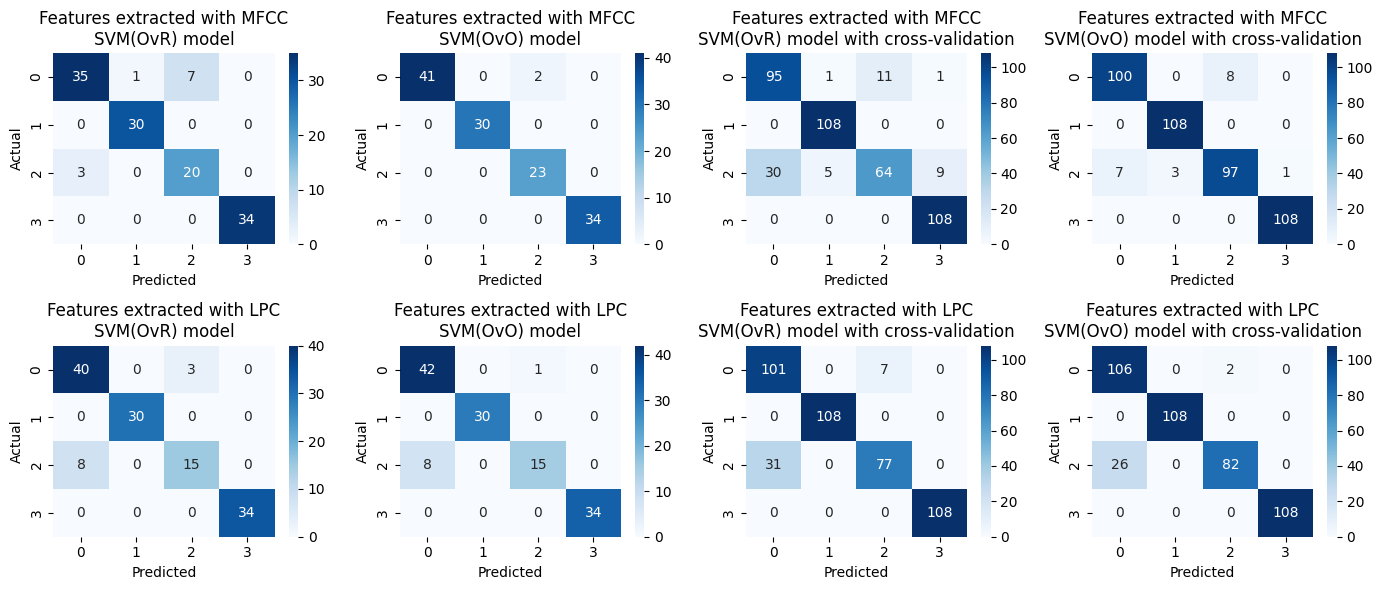

In [14]:
display_confusion_matrices(y_tests, y_preds, titles)

In [ ]:
titles = ['Features extracted with MFCC SVM(OvR) model', 'Features extracted with MFCC SVM(OvO) model',
          'Features extracted with MFCC SVM(OvR) model with cross-validation', 'Features extracted with MFCC SVM(OvO) model with cross-validation',
          'Features extracted with LPC SVM(OvR) model', 'Features extracted with LPC SVM(OvO) model',
          'Features extracted with LPC SVM(OvR) model with cross-validation', 'Features extracted with LPC SVM(OvO) model with cross-validation',]

def plot_classification_metrics_multiple(y_tests, y_preds, titles):
    '''
    Function that displays the ‘Precision’ ‘Recall’ and ‘F1-score’ for multiple models on a graph.

    Input:
      - y_tests: (list) List of arrays with the true values (y_test) of each model.
      - y_preds: (list) List of arrays with the predicted values (y_pred) of each model.
      - titles (list) List of titles for each subplot.
    '''

    num_models = len(y_tests)
    fig, axes = plt.subplots(2, 4, figsize=(30, 10))
    axes = axes.flatten()

    for i in range(num_models):
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_tests[i], y_preds[i], average=None)
        x = np.arange(len(precision))  # Label locations
        width = 0.3  # Width of the bars

        axes[i].bar(x - width, precision, width, label='Precision', color='darkturquoise')
        axes[i].bar(x, recall, width, label='Recall', color='darksalmon')
        axes[i].bar(x + width, f1_score, width, label='F1 Score', color='darkseagreen')

        axes[i].set_ylabel('Scores')
        axes[i].set_title(titles[i])
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(['Class 0 - Crying baby', 'Class 1 - Silence', 'Class 2 - Noise', 'Class 3 - Baby laugh'])
        axes[i].legend()

        # Adding labels on the bars
        def autolabel(rects, ax):
            '''
            Function to add labels on the bars.
            '''
            for rect in rects:
                height = rect.get_height()
                ax.annotate('{}'.format(round(height, 2)),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')

        rects1 = axes[i].bar(x - width, precision, width, color='darkturquoise')
        rects2 = axes[i].bar(x, recall, width, color='darksalmon')
        rects3 = axes[i].bar(x + width, f1_score, width, color='darkseagreen')

        autolabel(rects1, axes[i])
        autolabel(rects2, axes[i])
        autolabel(rects3, axes[i])

    fig.tight_layout()
    plt.show()

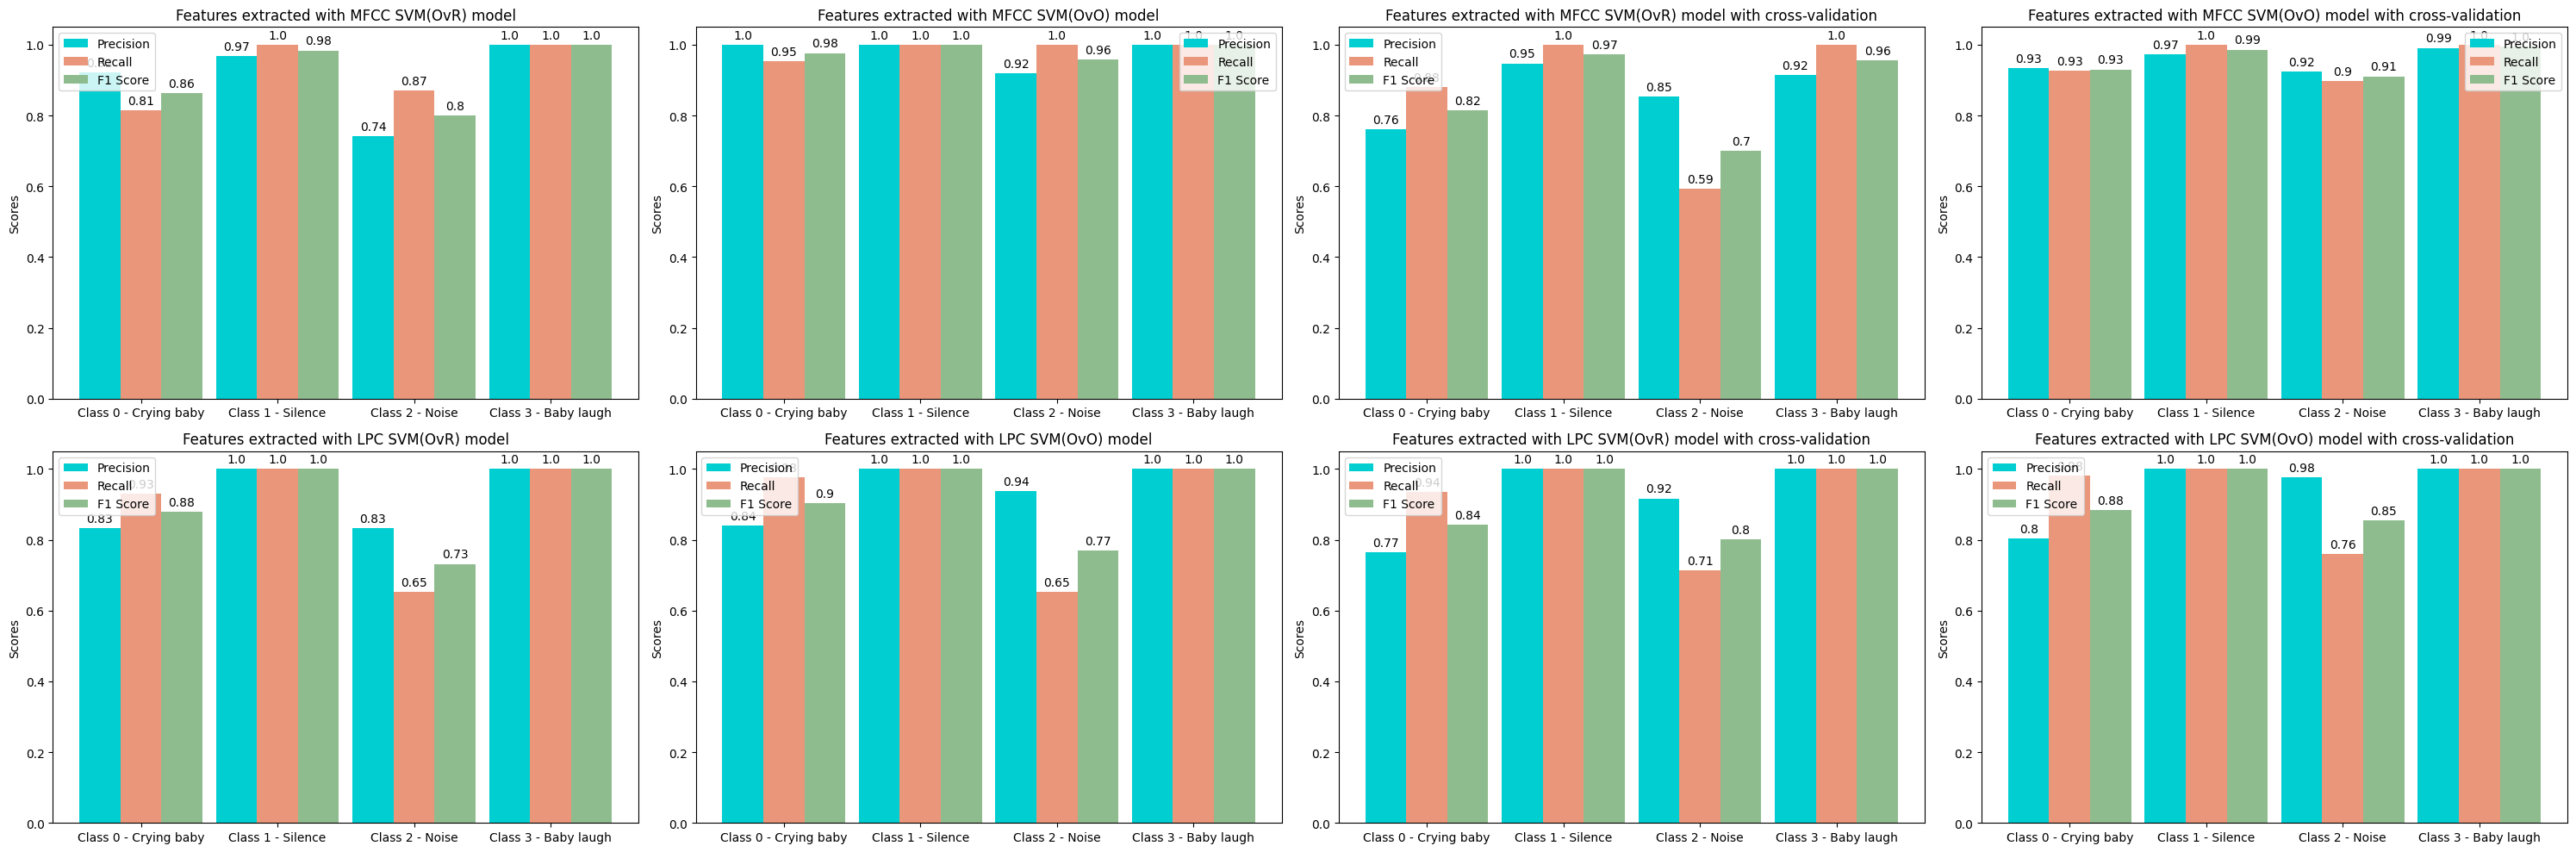

In [16]:
plot_classification_metrics_multiple(y_tests, y_preds, titles)